#Shopee Competition

##Importing data from google drive


In [ ]:
# Connecting colab notebook to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#changing the working directory
%cd /content/gdrive/MyDrive/Kaggle_Data/Shopee_Data
#Check the present working directory using pwd command

/content/gdrive/MyDrive/Kaggle_Data/Shopee_Data


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  

#EDA

In [ ]:

# Importing libraries
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
# taking a peek at traing data
traindf = pd.read_csv("train.csv")
traindf

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [ ]:
# Testing data
testdf = pd.read_csv("test.csv")
testdf

,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


In [ ]:
# sample of submission for the compitition
sample = pd.read_csv("sample_submission.csv")
sample

,posting_id,matches
0,test_2255846744,test_2255846744
1,test_3588702337,test_3588702337
2,test_4015706929,test_4015706929


## findings
There are 5 items in the data folder 

  **traing.csv**: contain the ID, img name, image phash, title and ***label group***

  **test.csv**: same as train.csv but has no ***label group***

  **sample_submission.csv**: contain the ID and new column called ***matches***

  **train_images**: folder contain image for training the model
  **test_images**: folder contain image for testing the model

  -----------------------------------------------------------------
  I think it's easier to imagine Instagram etc., where the data has an image, a hashtag, a title and a posting id corresponding to each post.

From the image group of the test data and the information such as the hashtag and title of each image, I think that it is a competition to group the same product in the test data, describe it and submit it.

Like the test data, the train data has images, hash tabs, titles, etc., but there is an item called label image group that is not included in the test data item, and they are grouped by the same product. I guess I will use that information.


## joining the path of the images with data 

In [ ]:
TRAIN_PATH = "/content/gdrive/MyDrive/Kaggle_Data/Shopee_Data/train_images"
TEST_PATH = "/content/gdrive/MyDrive/Kaggle_Data/Shopee_Data/test_images"

traindf["path"] = [os.path.join(TRAIN_PATH,s) for s in traindf["image"]]
testdf["path"] = [os.path.join(TEST_PATH,s) for s in testdf["image"]]

traindf.to_csv("traindf.csv",index=False)
testdf.to_csv("testdf.csv",index=False)

In [ ]:
# checking the new data frame
traindf.head(3)

,posting_id,image,image_phash,title,label_group,path
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...


In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
 5   path         34250 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


from the result above there is no nan and There are 34250 row in total in traing data

In [ ]:
# checking unique values
for col in traindf.columns:
    print(col + ":" + str(len(traindf[col].unique())))

posting_id:34250
image:32412
image_phash:28735
title:33117
label_group:11014
path:32412


This result shows how unique words are in each column.

34250 in total. 
There are duplicates other than posting id.

Due to the nature of the competition, there may be duplicates in label_group, but there are also duplicates in image, image_phash, and title.

## Displaying images from the data

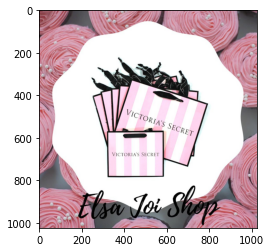

In [ ]:
img = cv2.imread(traindf["path"].iloc[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
tmpdf = traindf[traindf["label_group"]==traindf["label_group"].iloc[0]]
tmpdf

,posting_id,image,image_phash,title,label_group,path
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
33161,train_2278313361,f83b49a86a0ee8592e3bf0204da3fbdf.jpg,ac63931c3d4b42f6,PAPER BAG VICTORIA SECRET,249114794,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...


as seen above there are **two duplicat** from label group that match prevouse image

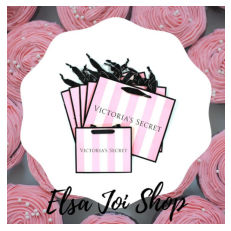

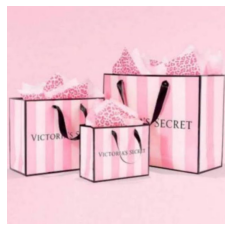

In [ ]:
for a in tmpdf["path"]:
    img = cv2.imread(a)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.imshow(img)
    plt.axis("off")

Both were from Victoria secret, and we were able to confirm that the same product was in the same label group. 

# more Analyzes on the same **label_groups**  

## grouping similar image with the same label_groups in new dataframe

In [ ]:
labels = traindf.groupby("label_group")["image"].count().reset_index()
labels.columns=["label_group","image_num"]
labels

,label_group,image_num
0,258047,3
1,297977,2
2,645628,12
3,801176,2
4,887886,2
...,...,...
11009,4292154092,2
11010,4292520070,11
11011,4292939171,2
11012,4293276364,2


In [ ]:
sortlabels = labels.sort_values("image_num")
sortlabels

,label_group,image_num
3764,1471548468,2
8718,3381177724,2
4946,1934657835,2
8720,3381497963,2
4943,1932824351,2
...,...,...
2606,994676122,51
8037,3113678103,51
1445,562358068,51
9370,3627744656,51


after sorting , The minimum number for similar image is 2 also the maximum number of similar image for the same product is 51.


display the image of the product with the largest number of images in label_group. ¶

In [ ]:
tmpdf = traindf[traindf["label_group"]==sortlabels["label_group"].iloc[-1]]
tmpdf.head(5)

,posting_id,image,image_phash,title,label_group,path
1167,train_207039286,09165142230c0d600c02a66f62dbee5d.jpg,8b1cbc63e330c69d,Ready Stock - Gluta Collagen Soap By Beautetox...,159351600,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
2069,train_1619338643,0ff3d417c454a614596da0f160e85b83.jpg,e3d894276a58c1de,GLUTA COLLAGEN SOAP BY BEAUTETOX SKINSUPERSTAR,159351600,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
2542,train_3721308865,136d7ea9fefe1cc04b6a8dfd965cbc9e.jpg,faad9752e4991162,KIRIM SETIAP HARI!! GLUTA COLLAGEN SOAP BEAUTE...,159351600,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
3140,train_1851882944,18244a8fdbb3aa0b5afb6c31d99134a5.jpg,e893a3d4a48d3973,[Ready & Resmi] Gluta Soap Beautetox Viral,159351600,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
3989,train_1236075269,1e4b5a9adc92e50df500e24d935fe0db.jpg,a0c4be17b3393693,READY STOK [THE3ANGLE-KD] Gluta Collagen Beaut...,159351600,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...


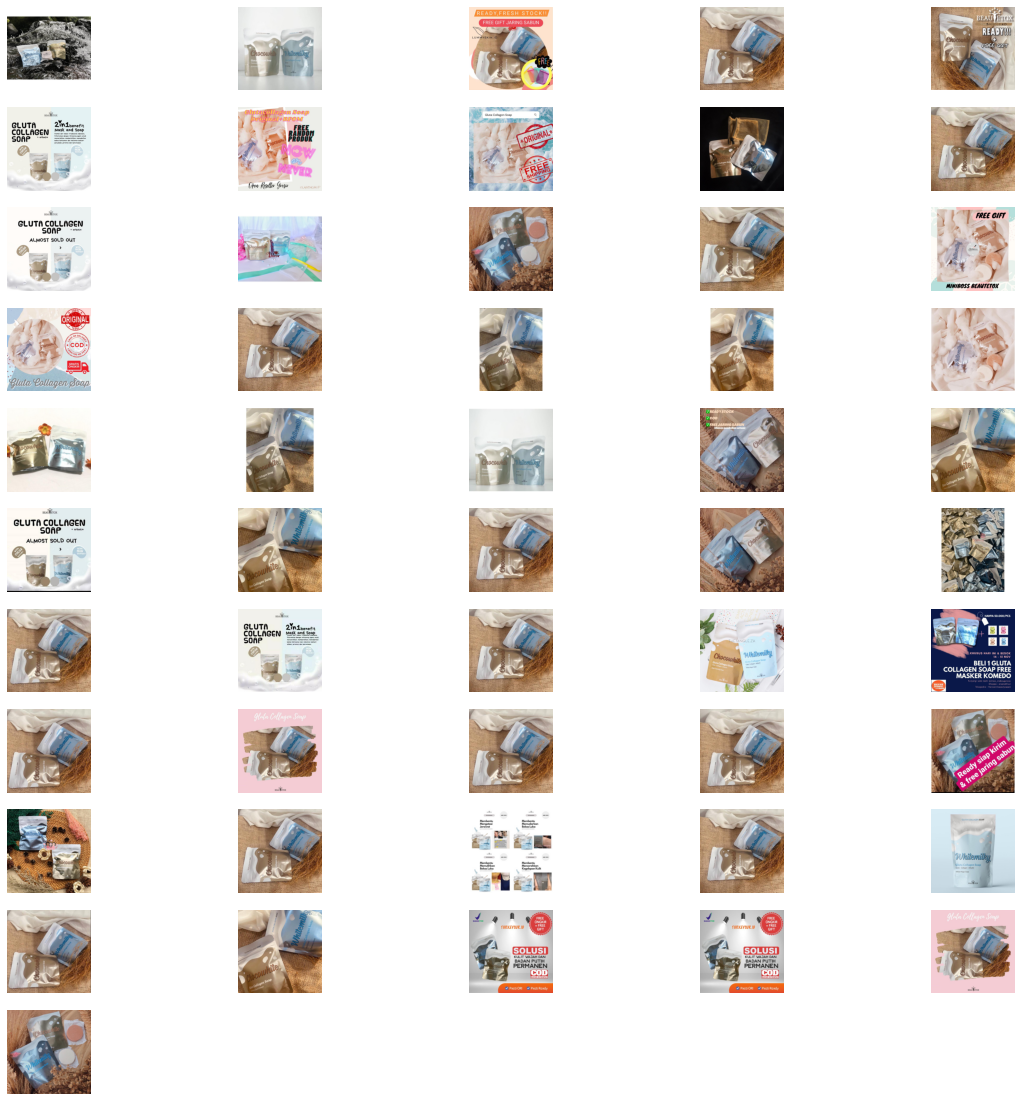

In [ ]:
plt.figure(figsize=(20,20))

for num,a in enumerate(tmpdf["path"]):
    plt.subplot(11,5,num+1)
    img = cv2.imread(a)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
titlegroup = traindf.groupby("title")["path"].count().reset_index()
titlegroup.columns=["title","counts"]
sorttitle = titlegroup.sort_values("counts")

tmpdf = traindf[traindf["title"]==sorttitle["title"].iloc[-1]]
tmpdf

,posting_id,image,image_phash,title,label_group,path
11299,train_437123271,54ebc3ef04985b9f90e43fa6eaa14fa8.jpg,daa5b58127c83cda,Koko syubbanul muslimin koko azzahir koko baju,1241012862,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
18979,train_1091145610,8f1310e4dfdb14d4f6e6e54814af8a56.jpg,fe84bef66060413b,Koko syubbanul muslimin koko azzahir koko baju,373863554,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
22336,train_2035900367,a7b5b681b23b5834dfe0454f883697c5.jpg,cbe91696b54be148,Koko syubbanul muslimin koko azzahir koko baju,536452526,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
23224,train_2183656041,ae64de9e8d31ae6d049581aec42e0442.jpg,be93e479811886f9,Koko syubbanul muslimin koko azzahir koko baju,1918908464,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
25616,train_2886681369,bf9c11baa39f23f1d34cd1fe617af88c.jpg,9be469c17e8914cb,Koko syubbanul muslimin koko azzahir koko baju,373863554,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
26425,train_1064632030,c5b2b6180559ea2f341c48527031aa33.jpg,ecf00f879904f0f9,Koko syubbanul muslimin koko azzahir koko baju,1918908464,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
27834,train_3378928984,d0403c82fbb237857869ff14fb4c9765.jpg,e0bca5d826d8da87,Koko syubbanul muslimin koko azzahir koko baju,373863554,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
29611,train_3767027123,ddd51a41c49b2fb6a4ad7b3b4e4566d9.jpg,c9af52bc94c95781,Koko syubbanul muslimin koko azzahir koko baju,1912222471,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...
32475,train_556227538,f35f6a4960db6d9c589b2cf7e58f0de6.jpg,be945bd1c06ee690,Koko syubbanul muslimin koko azzahir koko baju,1663491238,/content/gdrive/MyDrive/Kaggle_Data/Shopee_Dat...


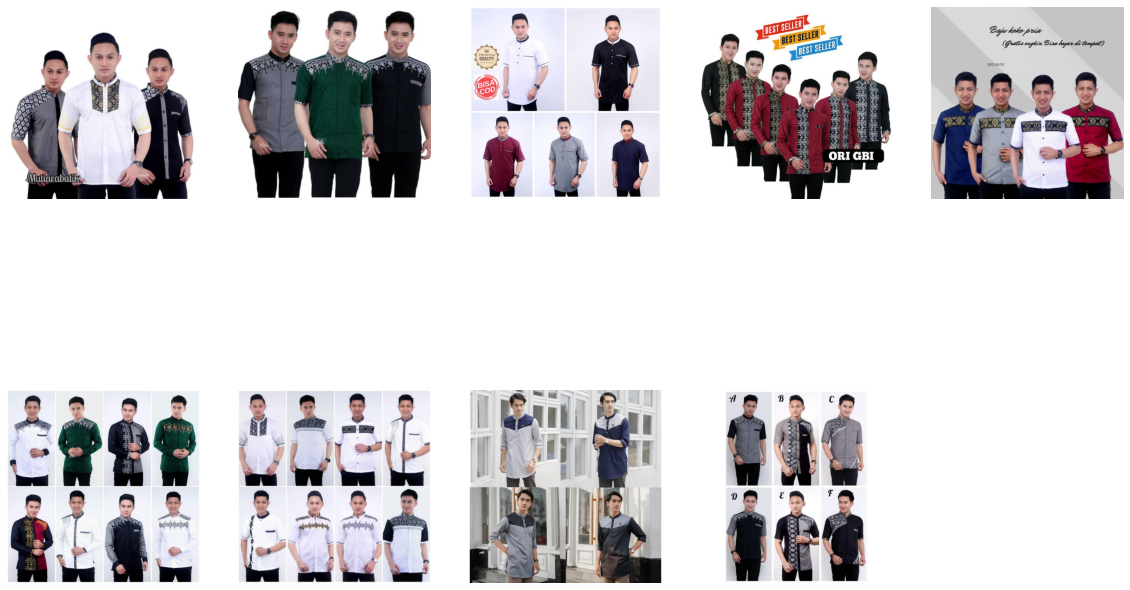

In [ ]:
plt.figure(figsize=(20,20))

for num,a in enumerate(tmpdf["path"]):
    plt.subplot(3,5,num+1)
    img = cv2.imread(a)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.axis("off")
    plt.imshow(img)